In [33]:
#import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import algorithms

from sklearn import linear_model,preprocessing,tree,model_selection,svm

from sklearn.naive_bayes import GaussianNB

In [34]:
#Load Dataset
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [36]:
#Distribution of Survival

train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

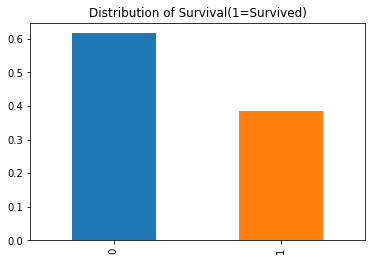

In [37]:
train_df.Survived.value_counts(normalize = True).plot(kind="bar")
plt.title("Distribution of Survival(1=Survived)")
plt.show()

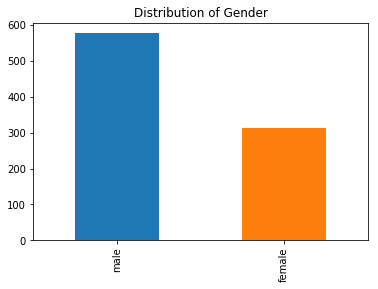

In [38]:
train_df.Sex.value_counts().plot(kind = "bar")
plt.title("Distribution of Gender")
plt.show()

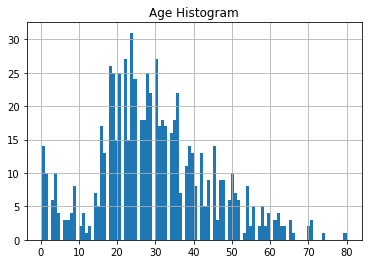

In [39]:
train_df['Age'].hist(bins =100)
plt.title("Age Histogram")
plt.show()

In [40]:
print(train_df.Pclass.value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


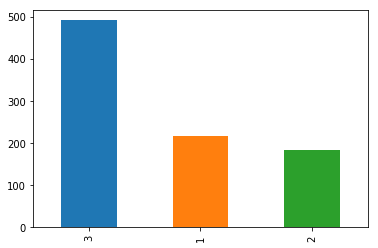

In [41]:
train_df.Pclass.value_counts().plot(kind="bar")

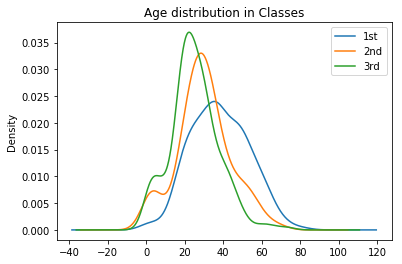

In [42]:
for x in [1,2,3]:
    train_df.Age[train_df.Pclass==x].plot(kind = "kde")
plt.title("Age distribution in Classes")
plt.legend(("1st","2nd","3rd"))
plt.show()

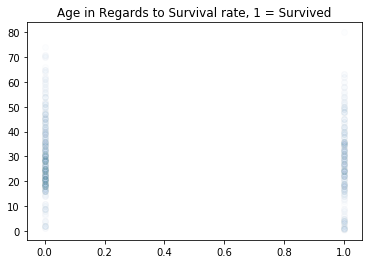

In [43]:
plt.scatter(train_df.Survived,train_df.Age,alpha =0.01)
plt.title("Age in Regards to Survival rate, 1 = Survived")
plt.show()

female    0.681287
male      0.318713
Name: Sex, dtype: float64


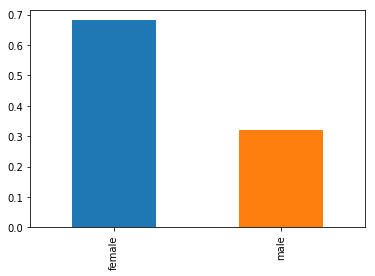

In [44]:
print(train_df.Sex[train_df.Survived==1].value_counts(normalize = True))
train_df.Sex[train_df.Survived==1].value_counts(normalize = True).plot(kind ="bar")

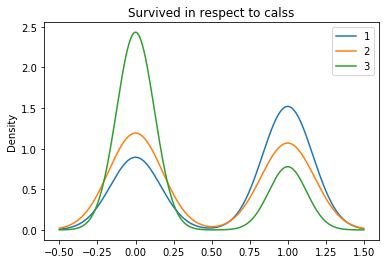

In [45]:
for x in [1,2,3]:
    train_df.Survived[train_df.Pclass==x].plot(kind = "kde")
plt.title("Survived in respect to calss")
plt.legend(("1","2","3"))
plt.show()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


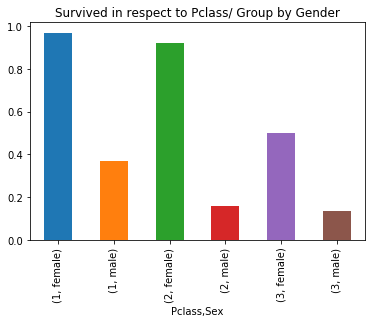

In [46]:
print(train_df.groupby(["Pclass","Sex"]).Survived.mean())
train_df.groupby(["Pclass","Sex"]).Survived.mean().plot(kind="bar")
plt.title("Survived in respect to Pclass/ Group by Gender")
plt.show()

In [47]:
train_df.Sex = train_df.Sex.map({"male":0,"female":1})
train_df.info()
train_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [48]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].dropna().median())
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [49]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [52]:
train_df["Hyp"]=0
train_df.loc[train_df.Sex==1,"Hyp"]=1
train_df["Result"]=0
train_df.loc[train_df.Survived==train_df["Hyp"],"Result"]=1
train_df.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hyp,Result
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,1,1


In [54]:
train_df["Result"].value_counts(normalize=True)

1    0.786756
0    0.213244
Name: Result, dtype: float64

In [56]:
training_feature_names = ["Pclass","Age","Fare","Sex","SibSp","Parch"]
training_target = train_df["Survived"].values
training_features = train_df[training_feature_names].values
training_features

array([[ 3.    , 22.    ,  7.25  ,  0.    ,  1.    ,  0.    ],
       [ 1.    , 38.    , 71.2833,  1.    ,  1.    ,  0.    ],
       [ 3.    , 26.    ,  7.925 ,  1.    ,  0.    ,  0.    ],
       ...,
       [ 3.    , 28.    , 23.45  ,  1.    ,  1.    ,  2.    ],
       [ 1.    , 26.    , 30.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    , 32.    ,  7.75  ,  0.    ,  0.    ,  0.    ]])

In [63]:
MLalgo=linear_model.LogisticRegression(solver='liblinear')
MLmodel = MLalgo.fit(training_features,training_target)
print("Linear score is",MLmodel.score(training_features,training_target))

Linear score is 0.8002244668911336


In [62]:
scores = model_selection.cross_val_score(MLalgo,training_features,training_target,scoring="accuracy",cv=100)
scores.mean()

0.7925555555555556

In [69]:
poly = preprocessing.PolynomialFeatures(degree=2)
poly_features =poly.fit_transform(training_features)
MLmodel = MLalgo.fit(poly_features,training_target)
print("Poly score is",MLmodel.score(poly_features,training_target))

scores = model_selection.cross_val_score(MLalgo,poly_features,training_target,scoring="accuracy",cv=100)
scores.mean()

Poly score is 0.8271604938271605


0.8150555555555556

In [71]:
MLalgo =tree.DecisionTreeClassifier(random_state=1)
MLmodel = MLalgo.fit(training_features,training_target)
print("Decision Tree score is",MLmodel.score(training_features,training_target))

scores = model_selection.cross_val_score(MLalgo,training_features,training_target,scoring="accuracy",cv=100)
scores.mean()


Decision Tree score is 0.9797979797979798


0.7864444444444445

In [72]:
MLalgo =tree.DecisionTreeClassifier(random_state=1,max_depth=3,min_samples_split=4)
MLmodel = MLalgo.fit(training_features,training_target)
print("Decision Tree score is",MLmodel.score(training_features,training_target))

scores = model_selection.cross_val_score(MLalgo,training_features,training_target,scoring="accuracy",cv=100)
scores.mean()


Decision Tree score is 0.8271604938271605


0.8176388888888888